In [1]:
import sys
import os
import gzip
import shutil
import json
import pandas as pd
import _pickle as pickle
import numpy as np
%matplotlib inline

## Preprocess treatment data

In [30]:
### Interpreting json file
bg_path = '/home/jupyter/work/openaps/data/99908129/direct-sharing-31/entries_2017-01-01_to_2017-10-24.json'
treat_path = '/home/jupyter/work/openaps/data/99908129/direct-sharing-31/treatments_2017-01-01_to_2017-10-24.json'
df_bg = pd.read_json(bg_path)
df_treat = pd.read_json(treat_path)

In [15]:
df_bg.head()

,_id,_tell,body,date,dateString,date_type,device,direction,display_time,glucose,name,op,packet_size,raw,sgv,trend,trend_arrow,type
0,59ee817e32c555f2c8aae2ac,NaN,NaN,2017-10-23 23:55:08,2017-10-23T23:55:08.000Z,NaN,share2,SingleUp,NaT,NaN,NaN,NaN,NaN,NaN,190,2.0,NaN,sgv
1,59ee805232c555f2c8aaddf2,NaN,NaN,2017-10-23 23:50:08,2017-10-23T23:50:08.000Z,NaN,share2,DoubleUp,NaT,NaN,NaN,NaN,NaN,NaN,187,1.0,NaN,sgv
2,59ee7f2732c555f2c8aad933,NaN,NaN,2017-10-23 23:45:08,2017-10-23T23:45:08.000Z,NaN,share2,DoubleUp,NaT,NaN,NaN,NaN,NaN,NaN,178,1.0,NaN,sgv
3,59ee7dfb32c555f2c8aad467,NaN,NaN,2017-10-23 23:40:07,2017-10-23T23:40:07.000Z,NaN,share2,SingleUp,NaT,NaN,NaN,NaN,NaN,NaN,163,2.0,NaN,sgv
4,59ee7cce32c555f2c8aacf7e,NaN,NaN,2017-10-23 23:35:08,2017-10-23T23:35:08.000Z,NaN,share2,FortyFiveUp,NaT,NaN,NaN,NaN,NaN,NaN,145,3.0,NaN,sgv


In [31]:
df_bg.date.min()

Timestamp('2017-03-19 13:11:19')

In [32]:
df_bg.date.max()

Timestamp('2017-10-23 23:55:08')

In [25]:
df_bg.isnull().sum()

_id                 0
_tell           52586
body            55266
date                0
dateString          0
date_type       52586
device              0
direction         463
display_time    52586
glucose         52567
name            52586
op              52586
packet_size     52586
raw             55266
sgv                 0
trend            2879
trend_arrow     53049
type                0
dtype: int64

In [33]:
cols=['date', 'sgv','type']
df_bg=df_bg[cols]

In [34]:
df_bg = df_bg.set_index('date').sort_index()
df_bg.index

DatetimeIndex(['2017-03-19 13:11:19', '2017-03-19 13:16:19',
               '2017-03-19 13:21:19', '2017-03-19 13:26:19',
               '2017-03-19 13:31:19', '2017-03-19 13:36:19',
               '2017-03-19 13:41:19', '2017-03-19 13:46:20',
               '2017-03-19 13:51:19', '2017-03-19 13:56:19',
               ...
               '2017-10-23 23:10:07', '2017-10-23 23:15:07',
               '2017-10-23 23:20:08', '2017-10-23 23:25:08',
               '2017-10-23 23:30:08', '2017-10-23 23:35:08',
               '2017-10-23 23:40:07', '2017-10-23 23:45:08',
               '2017-10-23 23:50:08', '2017-10-23 23:55:08'],
              dtype='datetime64[ns]', name='date', length=55465, freq=None)

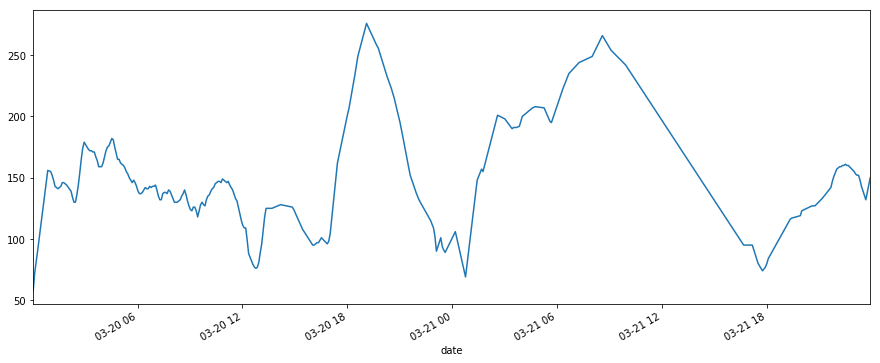

In [38]:
df_bg['2017-03-20':'2017-03-21'].sgv.plot(figsize=(15,6))

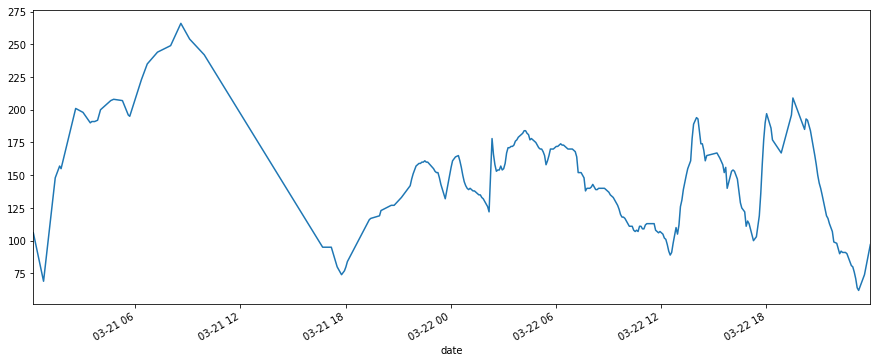

In [39]:
df_bg['2017-03-21':'2017-03-22'].sgv.plot(figsize=(15,6))

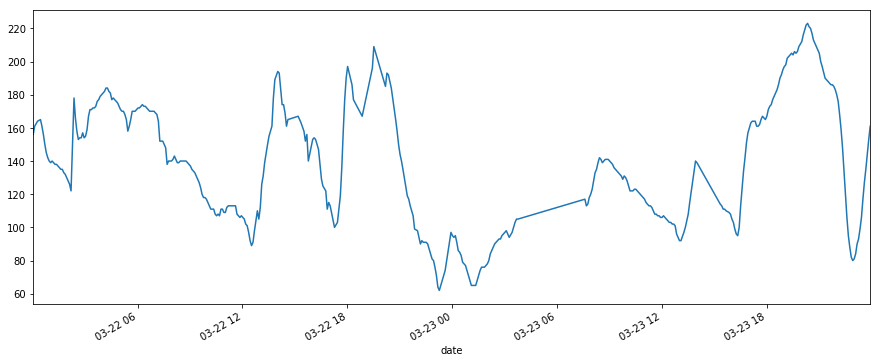

In [40]:
df_bg['2017-03-22':'2017-03-23'].sgv.plot(figsize=(15,6))

In [51]:
df_treat= df_treat[['created_at','timestamp','eventType', 'absolute', 'rate', 'duration','raw_duration', 'raw_rate']]

In [54]:
df_treat['created_at'].min()

'2017-03-19T15:46:00-04:00'

In [55]:
df_treat['created_at'].max()

'2017-10-23T23:52:07-04:00'

In [60]:
pd.to_datetime(df_treat['created_at'])

0               2017-10-23 23:52:07-04:00
1               2017-10-23 23:47:41-04:00
2               2017-10-23 23:45:29-04:00
3               2017-10-23 23:45:28-04:00
4               2017-10-23 23:45:27-04:00
5               2017-10-23 23:32:39-04:00
6               2017-10-23 23:29:13-04:00
7               2017-10-23 23:27:29-04:00
8               2017-10-23 23:25:00+00:00
9               2017-10-23 23:24:49-04:00
10              2017-10-23 23:24:08-04:00
11              2017-10-23 23:23:55-04:00
12              2017-10-23 23:18:05-04:00
13              2017-10-23 23:13:42-04:00
14              2017-10-23 23:13:25-04:00
15              2017-10-23 23:10:52-04:00
16              2017-10-23 23:09:32-04:00
17              2017-10-23 22:53:04-04:00
18              2017-10-23 22:30:25-04:00
19              2017-10-23 22:12:38-04:00
20              2017-10-23 22:07:31-04:00
21       2017-10-23 22:04:40.124000+00:00
22              2017-10-23 21:47:52-04:00
23              2017-10-23 21:45:3

In [53]:
df_treat.head()

,created_at,timestamp,eventType,absolute,rate,duration,raw_duration,raw_rate
0,2017-10-23T23:52:07-04:00,2017-10-24 03:52:07,Temp Basal,1.45,1.45,30.0,"{'_date': '87b4175711', 'duration (min)': 30, ...","{'temp': 'absolute', '_date': '87b4175711', 'r..."
1,2017-10-23T23:47:41-04:00,2017-10-24 03:47:41,Temp Basal,3.45,3.45,30.0,"{'_date': 'a9af175711', 'duration (min)': 30, ...","{'temp': 'absolute', '_date': 'a9af175711', 'r..."
2,2017-10-23T23:45:29-04:00,2017-10-24 03:45:29,Temp Basal,1.45,1.45,30.0,"{'_date': '9dad175711', 'duration (min)': 30, ...","{'temp': 'absolute', '_date': '9dad175711', 'r..."
3,2017-10-23T23:45:28-04:00,2017-10-24 03:45:28,Temp Basal,1.45,1.45,30.0,"{'_date': '9cad175711', 'duration (min)': 30, ...","{'temp': 'absolute', '_date': '9cad175711', 'r..."
4,2017-10-23T23:45:27-04:00,2017-10-24 03:45:27,Temp Basal,1.45,1.45,30.0,"{'_date': '9bad175711', 'duration (min)': 30, ...","{'temp': 'absolute', '_date': '9bad175711', 'r..."


In [46]:
df_treat.isnull().sum()

_body                22327
_date                22327
_description         22327
_head                22327
_id                      0
_type                22327
absolute              3889
alarm_description    23828
alarm_type           23828
amount               23014
appended             23827
bg                   23400
bolus                21662
carb_input           23816
carbs                23378
changed              23836
created_at               0
duration              1539
enteredBy                1
eventType                0
fixed                23686
glucose              22799
glucoseType          22799
insulin              21660
invalid              23842
maxBasal             23839
medtronic              170
notes                20712
preBolus             23842
rate                  3880
ratio                23398
raw_duration          3889
raw_rate              3889
reason               23674
stale                23836
tail                 23836
targetBottom         23740
t

In [ ]:
cols = ['created_at', 'eventType', 'rate']

In [3]:
def transfer_dataframe(patient_id, file_name):
    with open(file_name) as file:
        j_object = json.load(file)
        df = pd.DataFrame(j_object)
        try:
            df['datetime'] = pd.to_datetime(df['timestamp'], utc=True)
        except:
            print(df['timestamp'].head())
            return None
            
        df['pid'] = patient_id
        df.sort_values(by='datetime', inplace=True)
        df_result = df[['pid', 'datetime', 'eventType', 'insulin','carbs','absolute','rate','duration']]

    return df_result

In [5]:
## these samples have less data missing problems
samples = ['96254963', '57176789', '20396154', '00897741',
       '66836068', '66019205', '95851255', '97417885', '20216809',
       '47750728', '60844515', '37764532', '43589707', '14092221',
       '96805916', '95614431', '21946407', '37948668', '25692073',
       '99848889', '15634563', '80796147']  

In [ ]:
## merge treatment files person to person

count = 0
path = '/Users/wang/data/OpenAPS'
for folder in samples:
    print('PID:', folder)
    record_path = path + '/' +folder+'/direct-sharing-31'
    if os.path.exists(record_path):
        files = os.listdir(record_path)
        df_folder = pd.DataFrame([], columns=['pid', 'datetime', 'eventType', 'insulin','carbs','absolute','rate','duration'])
        for file in files:
            if file.find('treatments') > -1 and file.endswith('.json'):
                print('file', file)
                df = transfer_dataframe(folder, record_path+'/'+file)
                if df is None:
                    continue
                df_folder = df_folder.append(df)
#         print('before drop', len(df_folder))
#         df_folder.drop_duplicates('datetime',inplace = True)
#         print('after drop', len(df_folder))
#         print('saving result...')
        pickle.dump(df_folder, open(path + '/treat_dfs/'+folder+'_treats.pkl', 'wb'))
# z


In [ ]:
# Synthesize treatment with entries

path_treat = '/Users/wang/data/OpenAPS/treat_dfs'
path_entries = '/Users/wang/data/OpenAPS/entry_dfs'
start_date = '2018-01-01'
end_date = '2018-01-31'

dfs = []
for sample in samples:
    #treats
    df_t = pickle.load(open(path_treat+'/'+sample+'_treats.pkl', 'rb'))
    df_t.set_index('datetime', inplace=True)
    df_t = df_t.tz_convert(None)
    df_t_2018 = df_t[start_date:end_date]
    #bg entries
    df_e = pickle.load(open(path_entries+'/'+sample+'_entries.pkl', 'rb'))
    df_e.set_index('datetime', inplace=True)
    df_e = df_e.tz_convert(None)
    df_e_2018 = df_e[start_date:end_date]
    
    df_2018 = pd.merge(df_e_2018,df_t_2018, on = 'pid', how='left' )
    df_2018.sort_index(inplace = True)
    print(df_2018.head(3))
    dfs.append(df_2018)
    
dfs_all = pd.concat(dfs)
pickle.dump(df_folder, open('/Users/wang/data/OpenAPS/sample_entry_treats.pkl', 'wb'))


        pid    sgv eventType insulin carbs absolute rate duration
0  27700103  134.0       NaN     NaN   NaN      NaN  NaN      NaN
1  27700103  138.0       NaN     NaN   NaN      NaN  NaN      NaN
2  27700103  148.0       NaN     NaN   NaN      NaN  NaN      NaN
        pid    sgv   eventType  insulin  carbs  absolute rate  duration
0  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      30.0
1  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      60.0
2  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      30.0
        pid  sgv   eventType  insulin  carbs  absolute rate  duration
0  57176789  118  Temp Basal      NaN    NaN       0.8  0.8      30.0
1  57176789  118  Temp Basal      NaN    NaN       1.2  1.2      30.0
2  57176789  118  Temp Basal      NaN    NaN       1.9  1.9      30.0
        pid  sgv   eventType  insulin  carbs  absolute  rate  duration
0  20396154  220  Temp Basal      NaN    NaN      0.00     0       0.0
1  20396154  220  Temp Bas

In [22]:
dfs_all['duration'].describe()

count    1.645022e+07
mean     3.332370e+01
std      4.195641e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.000000e+01
75%      3.000000e+01
max      7.200000e+02
Name: duration, dtype: float64

In [45]:
treats_df.columns

Index(['absolute', 'carbs', 'eventType', 'glucose', 'insulin', 'notes', 'pid',
       'rate', 'ratio'],
      dtype='object')

In [23]:
treats_df['eventType'].unique()

NameError: name 'treats_df' is not defined

In [44]:
entries_df.describe()

,pid,sgv
count,336123,334934.0
unique,41,373.0
top,74077367,110.0
freq,16951,3628.0


In [ ]:
df_2018_1 = pd.merge(treats_df, entries_df, on='pid')